
# Arbolado Ciudad de Buenos Aires 🌳

# Análisis basado en el Censo realizado en 2018 por el GCBA



### Introducción

Este conjunto diverso de códigos presenta un análisis detallado del arbolado urbano, explorando desde las especies más abundantes hasta la distribución de alturas de los árboles y la relación entre el ancho de las aceras y la altura de los mismos. A través de visualizaciones gráficas, como mapas de calor que revelan la concentración geográfica de árboles, hasta diagramas de caja que destacan las alturas de las especies más comunes, estos scripts ofrecen una visión completa del entorno urbano y su biodiversidad.



**Importado de librerías**

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
from folium.plugins import HeatMap
from branca.colormap import LinearColormap
from tabulate import tabulate
import folium


**Visualizar la Base de Datos**

In [2]:

# Leer el archivo Excel
arbolado = pd.read_excel('Arbolado.xlsx')

# Ajustar el ancho de las columnas
pd.set_option("display.max_colwidth", None)

# Mostrar las primeras 5 filas del DataFrame
print(arbolado.head(5))


        long        lat nro_registro tipo_activ  comuna manzana  \
0 -58.378563 -34.594902        26779     Lineal       1     NaN   
1 -58.381532 -34.592319        30887     Lineal       1     NaN   
2 -58.379103 -34.591939        30904     Lineal       1     NaN   
3 -58.380710 -34.591548        31336     Lineal       1     NaN   
4 -58.380710 -34.591548        31337     Lineal       1     NaN   

        calle_nombre calle_altura calle_chapa    direccion_normalizada  \
0          Esmeralda         1000        1120           ESMERALDA 1120   
1  Pellegrini Carlos         1300        1345  PELLEGRINI, CARLOS 1345   
2             Arroyo          800         848               ARROYO 848   
3             Arroyo          900         932               ARROYO 932   
4             Arroyo          900         932               ARROYO 932   

  ubicacion       nombre_cientifico ancho_acera estado_plantera  \
0       NaN            Tipuana tipu         5.5         Ocupada   
1    Exacta      P

**Contemplamos la cantidad de datos**

In [3]:
rows, col = arbolado.shape
print('En total hay {} árboles en sus veredad (no se cuentan los 50 mil aprox. que están en plazas y parques) y {} columnas con distintos datos en esta base.'.format(rows-1, col))


En total hay 370179 árboles en sus veredad (no se cuentan los 50 mil aprox. que están en plazas y parques) y 18 columnas con distintos datos en esta base.


**Columnas con mayor cantidad de nulls**

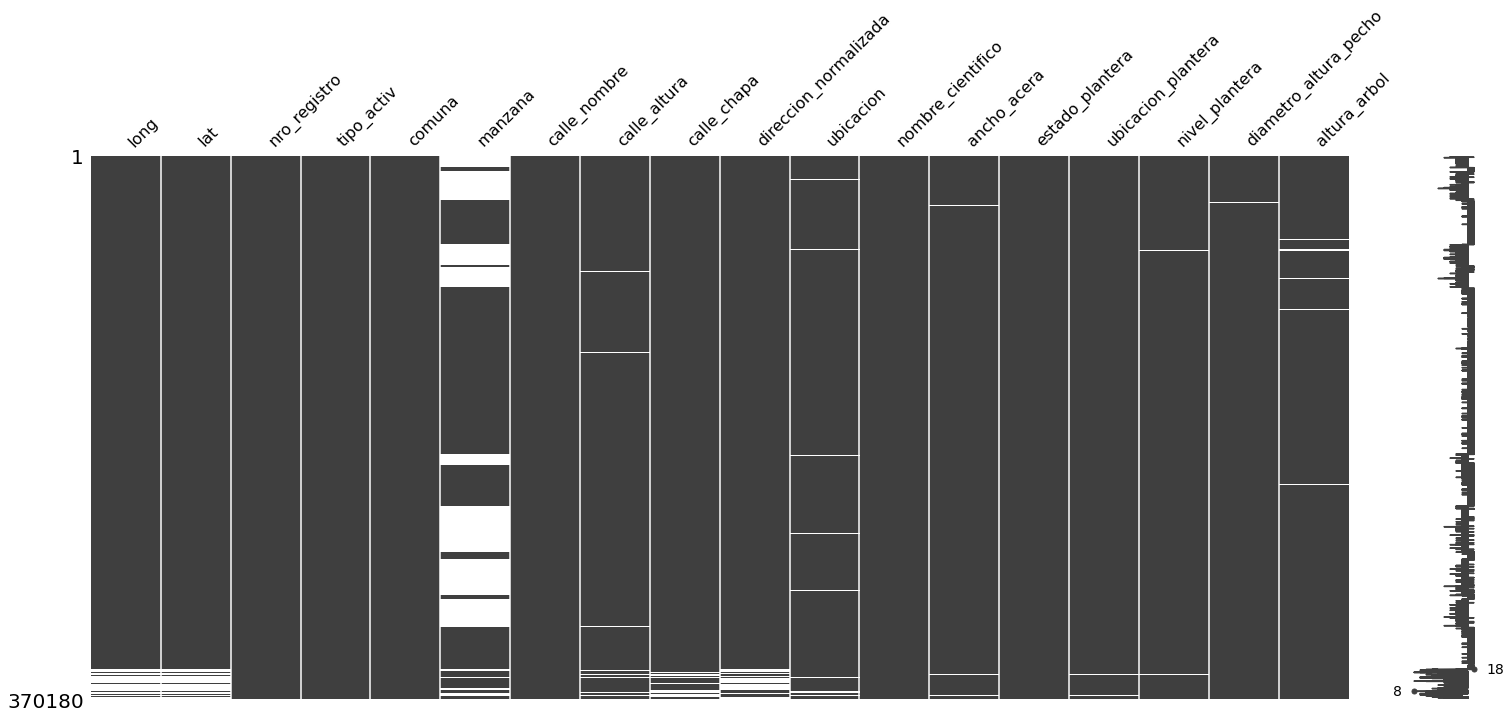

In [4]:

# Crear la matriz de visualización de valores nulos
msno.matrix(arbolado)

# Mostrar el gráfico
plt.show()


**Transformación de Nombres Científicos de Especies a Nombres Comunes**


In [5]:
# Definir el diccionario de reemplazo de nombres de especies específicas
reemplazos_especies = {
    'Fraxinus pennsylvanica': 'Fresno Americano',
    'Fraxinus americana': 'Fresno Americano',
    'Platanus x acerifolia': 'Platano',
    'Ficus benjamina': 'Ficus',
    'Tilia x moltkei': 'Tilo',
    'Melia azedarach': 'Paraiso',
    'Jacaranda mimosifolia': 'Jacaranda',
    'Lagerstroemia indica': 'Lila del Sur',
    'Tipuana tipu': 'Tipa',
    'Ligustrum lucidum': 'Aligustre',
    'Fraxinus excelsior': 'Fresno norteño'
}

# Aplicar el reemplazo directamente a la columna
arbolado['nombre_cientifico'] = arbolado['nombre_cientifico'].replace(reemplazos_especies)


**Top 10 Especies de Árboles Más Comunes y sus Porcentajes en el Arbolado Urbano**


In [7]:

# Filtrar las filas donde la especie no sea "No identificado"
arbolado_filtrado = arbolado[arbolado['nombre_cientifico'] != 'No identificado']

# Calcular el porcentaje de cada especie y seleccionar las 10 más comunes
porcentaje_especies_comunes = (arbolado_filtrado['nombre_cientifico'].value_counts() / len(arbolado_filtrado) * 100).head(10)

# Crear un DataFrame con las especies y sus porcentajes
top_10_especies_df = pd.DataFrame({
    'Especie': porcentaje_especies_comunes.index,
    'Porcentaje': porcentaje_especies_comunes.values
})

# Mostrar el DataFrame con tabulate
print(tabulate(top_10_especies_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒══════════════════╤══════════════╕
│ Especie          │   Porcentaje │
╞══════════════════╪══════════════╡
│ Fresno Americano │     39.8393  │
├──────────────────┼──────────────┤
│ Platano          │      8.95836 │
├──────────────────┼──────────────┤
│ Ficus            │      6.2389  │
├──────────────────┼──────────────┤
│ Tilo             │      4.32548 │
├──────────────────┼──────────────┤
│ Paraiso          │      4.13034 │
├──────────────────┼──────────────┤
│ Jacaranda        │      3.84512 │
├──────────────────┼──────────────┤
│ Lila del Sur     │      3.29463 │
├──────────────────┼──────────────┤
│ Tipa             │      2.58614 │
├──────────────────┼──────────────┤
│ Aligustre        │      2.48303 │
├──────────────────┼──────────────┤
│ Fresno norteño   │      2.38019 │
╘══════════════════╧══════════════╛


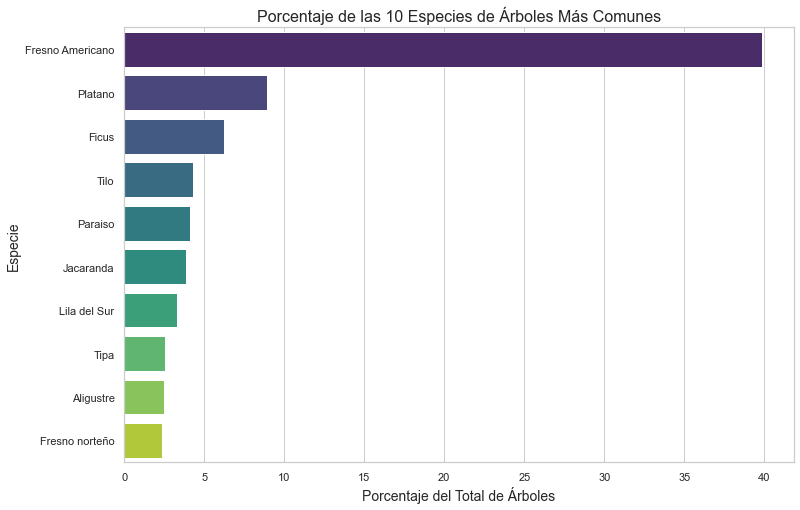

In [10]:

# Filtrar las filas donde la especie no sea "No identificado"
arbolado_filtrado = arbolado[arbolado['nombre_cientifico'] != 'No identificado']

# Calcular el porcentaje de cada especie y seleccionar las 10 más comunes
porcentaje_especies_comunes = (arbolado_filtrado['nombre_cientifico'].value_counts() / len(arbolado_filtrado) * 100).head(10)

# Configurar el estilo de seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras horizontales con seaborn
ax = sns.barplot(x=porcentaje_especies_comunes.values, y=porcentaje_especies_comunes.index, palette="viridis")

# Configurar el gráfico
ax.set_title('Porcentaje de las 10 Especies de Árboles Más Comunes', fontsize=16)
ax.set_xlabel('Porcentaje del Total de Árboles', fontsize=14)
ax.set_ylabel('Especie', fontsize=14)

# Mostrar el gráfico
plt.show()

**Las 3 especies más frecuentes en cada comuna**

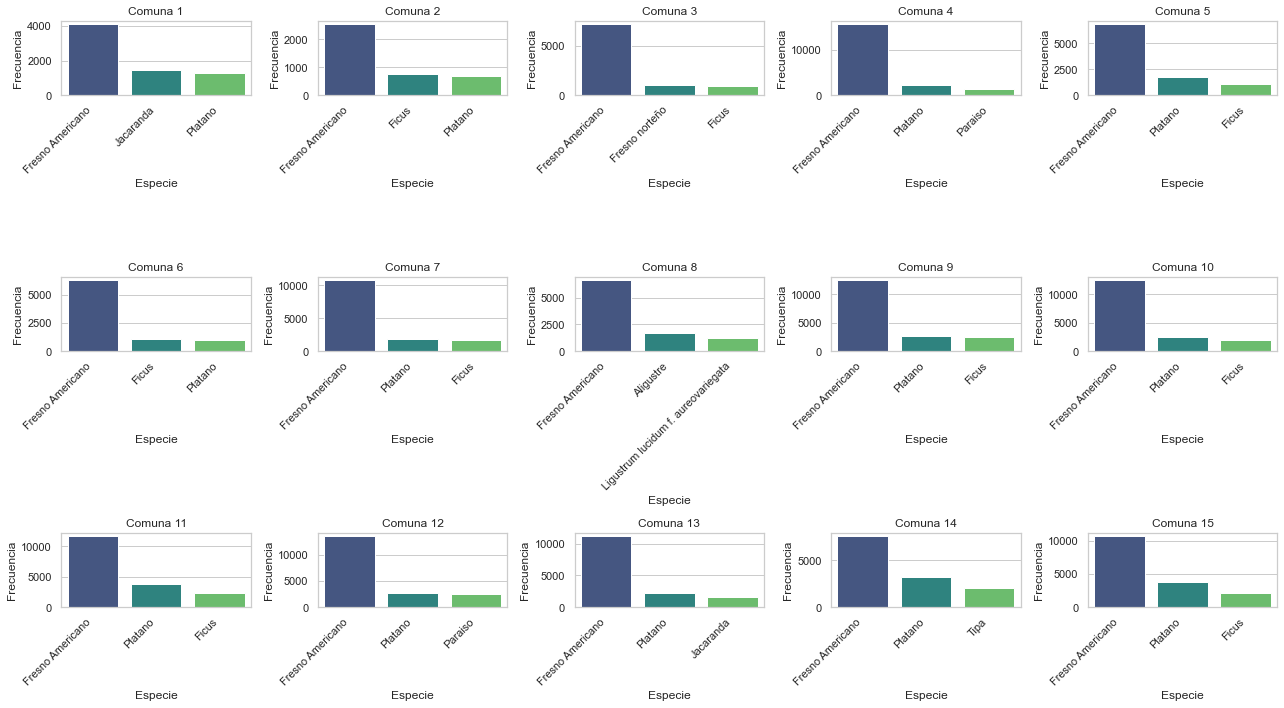

In [12]:
# Filtrar las filas con coordenadas no nulas
arbolado_con_coords = arbolado.dropna(subset=['lat', 'long'])

# Filtrar las filas donde la especie no sea "No identificado"
arbolado_filtrado = arbolado_con_coords[arbolado_con_coords['nombre_cientifico'] != 'No identificado']

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Obtener la lista de comunas
comunas = arbolado_filtrado['comuna'].unique()

# Configurar el tamaño del gráfico
plt.figure(figsize=(18, 10))

# Iterar sobre cada comuna para crear un gráfico individual
for i, comuna in enumerate(comunas, 1):
    # Filtrar por comuna
    arbolado_comuna = arbolado_filtrado[arbolado_filtrado['comuna'] == comuna]
    
    # Obtener las 3 especies más frecuentes
    especies_frecuentes = arbolado_comuna['nombre_cientifico'].value_counts().head(3).index
    
    # Filtrar por las especies más frecuentes
    arbolado_especies_frecuentes = arbolado_comuna[arbolado_comuna['nombre_cientifico'].isin(especies_frecuentes)]
    
    # Crear un gráfico de barras por comuna
    plt.subplot(3, 5, i)
    sns.countplot(x='nombre_cientifico', data=arbolado_especies_frecuentes, palette='viridis', order=especies_frecuentes)
    plt.title(f'Comuna {comuna}')
    plt.xlabel('Especie')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

**Distribución de Alturas de Árboles**

La mayoría de los árboles en #CABA miden entre 5 y 10 metros.  

También hay árboles de 40 metros pero son muy poco frecuentes, por eso no aparecen en el gráfico.

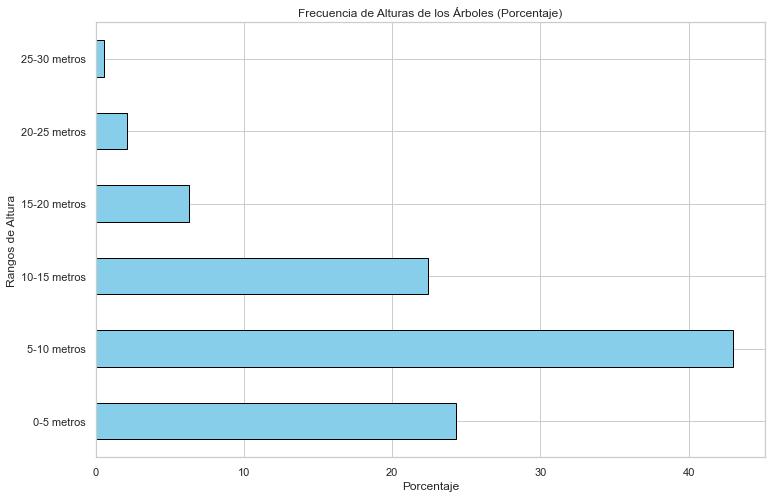

In [13]:
# Crear los bins para la altura de los árboles
bins = [i for i in range(0, 31, 5)]  # Ajuste el rango final y el paso

# Aplicar el binning y contar la frecuencia en cada bin
frecuencia_alturas = pd.cut(arbolado['altura_arbol'], bins=bins, include_lowest=True).value_counts().sort_index()

# Calcular los porcentajes
porcentaje_alturas = frecuencia_alturas / len(arbolado) * 100

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura

# Crear un gráfico de barras horizontales
porcentaje_alturas.plot(kind='barh', color='skyblue', edgecolor='black')

# Configurar las etiquetas del eje Y
etiquetas_y = [f'{int(bin.left)}-{int(bin.right)} metros' for bin in porcentaje_alturas.index]
plt.yticks(range(len(etiquetas_y)), etiquetas_y)

# Configurar el título y etiquetas
plt.title('Frecuencia de Alturas de los Árboles (Porcentaje)')
plt.xlabel('Porcentaje')
plt.ylabel('Rangos de Altura')

# Mostrar el gráfico
plt.show()


**Altura Promedio de las 10 especies más comunes en CABA** 

El Platano es la especie más alta con más de 16 metros de áltura promedio.

La Tipa tambié posee una áltura muy importante con 15 metros.

La mayoría del resto de las especies más frecuentes  están debajo de los 10 metros.

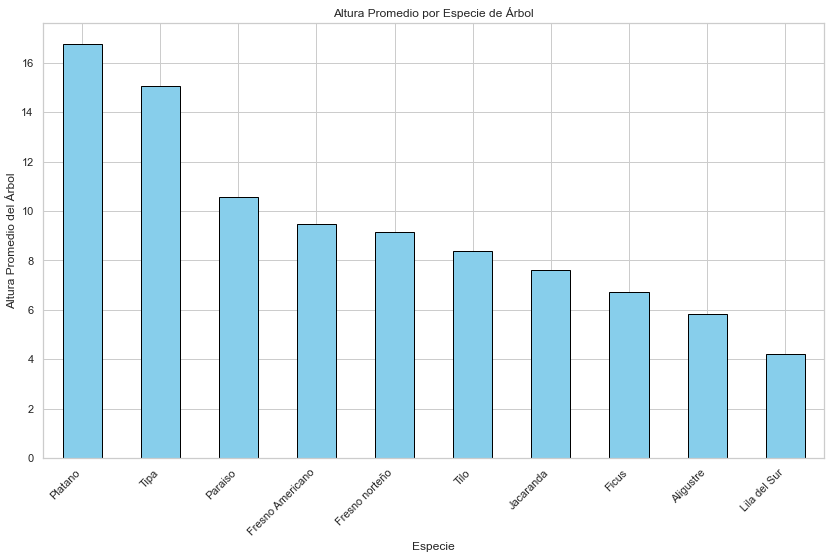

In [16]:

# Filtrar las filas donde la especie no sea "No identificado"
arbolado_filtrado = arbolado[arbolado['nombre_cientifico'] != 'No identificado']

# Seleccionar las principales 10 especies
top_10_especies = porcentaje_especies_comunes.index

# Filtrar el DataFrame por las 10 especies principales
arbolado_top_10_especies = arbolado_filtrado[arbolado_filtrado['nombre_cientifico'].isin(top_10_especies)]

# Calcular la altura promedio por especie
altura_promedio_por_especie = arbolado_top_10_especies.groupby('nombre_cientifico')['altura_arbol'].mean().sort_values(ascending=False)

# Configurar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear un gráfico de barras
altura_promedio_por_especie.plot(kind='bar', color='skyblue', edgecolor='black')

# Configurar el título y etiquetas
plt.title('Altura Promedio por Especie de Árbol')
plt.xlabel('Especie')
plt.ylabel('Altura Promedio del Árbol')

# Rotar etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

**Comparativa de alturas entre las 10 Especies de Árboles Más Comunes en un diagrama de cajas**

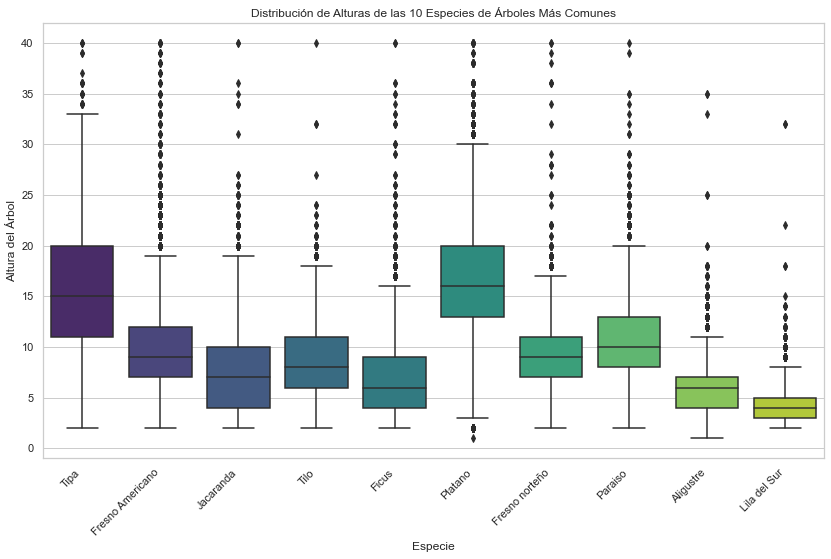

In [14]:
# Filtrar las filas donde la especie no sea "No identificado"
arbolado_filtrado = arbolado[arbolado['nombre_cientifico'] != 'No identificado']

# Seleccionar las principales 10 especies
top_10_especies = porcentaje_especies_comunes.index

# Filtrar el DataFrame por las 10 especies principales
arbolado_top_10_especies = arbolado_filtrado[arbolado_filtrado['nombre_cientifico'].isin(top_10_especies)]

# Configurar el estilo de seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Crear un gráfico de caja (boxplot)
sns.boxplot(x='nombre_cientifico', y='altura_arbol', data=arbolado_top_10_especies, palette="viridis")
plt.title('Distribución de Alturas de las 10 Especies de Árboles Más Comunes')
plt.xlabel('Especie')
plt.ylabel('Altura del Árbol')

# Rotar etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

**Altura Promedio de Árboles por Comuna**

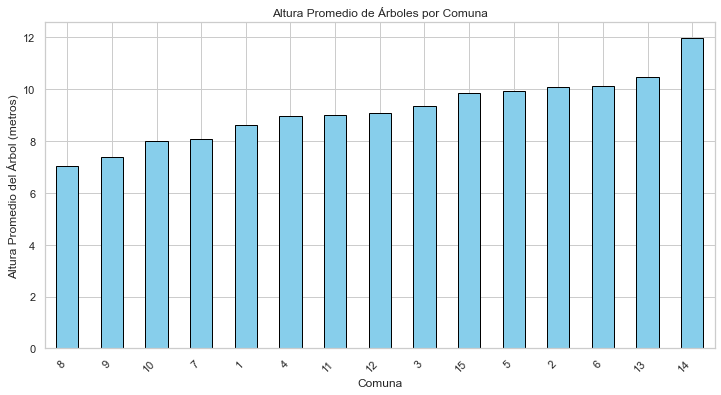

In [19]:

# Calcular la altura promedio por comuna
altura_promedio_por_comuna = arbolado.groupby('comuna')['altura_arbol'].mean().sort_values()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear un gráfico de barras
altura_promedio_por_comuna.plot(kind='bar', color='skyblue', edgecolor='black')

# Configurar el título y etiquetas
plt.title('Altura Promedio de Árboles por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Altura Promedio del Árbol (metros)')

# Rotar etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

**Mapa de calor 1**

En las zonas de verde oscuro se visualizan las áreas con más arboles mayores a 20 metros de áltura.

Es bastante proporcional con los barrios más afectados por el temporal del 17/12/2023 en Buenos Aires.

Palermo, Belgrano, Villa Devoto, Villa del Parque son claros ejemplos.

No se contempla en github, se sube la imagen en jpg.



In [18]:

# Filtrar los árboles con más de 10 metros
arbolado_mayor_10m = arbolado[arbolado['altura_arbol'] > 20]

# Filtrar las filas con coordenadas no nulas
arbolado_con_coords = arbolado_mayor_10m.dropna(subset=['lat', 'long'])

# Crear un mapa centrado en las coordenadas promedio
mapa_calor = folium.Map(location=[arbolado_con_coords['lat'].mean(), arbolado_con_coords['long'].mean()], zoom_start=12)

# Crear una lista de coordenadas
datos_calor = arbolado_con_coords[['lat', 'long']].values.tolist()

# Crear un mapa de colores personalizado
colormap = LinearColormap(['white', 'darkgreen'], vmin=0, vmax=1)

# Ajustar la escala de colores en la capa de mapa de calor
HeatMap(datos_calor, radius=7, blur=10, gradient={0.5: colormap(0), 0.5: colormap(0.3), 1.0: colormap(1)}).add_to(mapa_calor)

# Añadir la barra de colores al mapa
colormap.add_to(mapa_calor)

# Mostrar el mapa
mapa_calor

**Mapa de calor 2**

Idéntico al gráfico anterior pero con otras tonalidades, para que se visualice de forma más sencilla.

En las zonas rojas se visualizan las áreas con más arboles, en amarillo las intermedias y en verde claro las que menos arboles poseen.



In [28]:

# Filtrar los árboles con más de 10 metros
arbolado_mayor_10m = arbolado[arbolado['altura_arbol'] > 20]

# Filtrar las filas con coordenadas no nulas
arbolado_con_coords = arbolado_mayor_10m.dropna(subset=['lat', 'long'])

# Crear un mapa centrado en las coordenadas promedio
mapa_calor = folium.Map(location=[arbolado_con_coords['lat'].mean(), arbolado_con_coords['long'].mean()], zoom_start=12)

# Crear una lista de coordenadas
datos_calor = arbolado_con_coords[['lat', 'long']].values.tolist()

# Añadir la capa de mapa de calor con parámetros ajustados
HeatMap(datos_calor, radius=7, blur=10).add_to(mapa_calor)

# Mostrar el mapa
mapa_calor


En la zona señalada en rojo, se observa una mayor concentración de árboles con alturas inferiores a 10 metros. 


Esta distribución puede atribuirse a la plantación más reciente en esa área.


Son ejemplos los siguientes barrios:
Liniers, Mataderos, Lugano.

In [30]:

# Filtrar los árboles con menos de 5 metros
arbolado_menor_5m = arbolado[arbolado['altura_arbol'] < 10]

# Filtrar las filas con coordenadas no nulas
arbolado_con_coords = arbolado_menor_5m.dropna(subset=['lat', 'long'])

# Crear un mapa centrado en las coordenadas promedio
mapa_calor = folium.Map(location=[arbolado_con_coords['lat'].mean(), arbolado_con_coords['long'].mean()], zoom_start=12)

# Crear una lista de coordenadas
datos_calor = arbolado_con_coords[['lat', 'long']].values.tolist()

# Añadir la capa de mapa de calor con parámetros ajustados
HeatMap(datos_calor, radius=7, blur=10).add_to(mapa_calor)

# Mostrar el mapa
mapa_calor

**Ancho de las veredas**

La mayoría están entre 4 y 5 metros.

Son muy escasas las veredas con más de 5 metros.


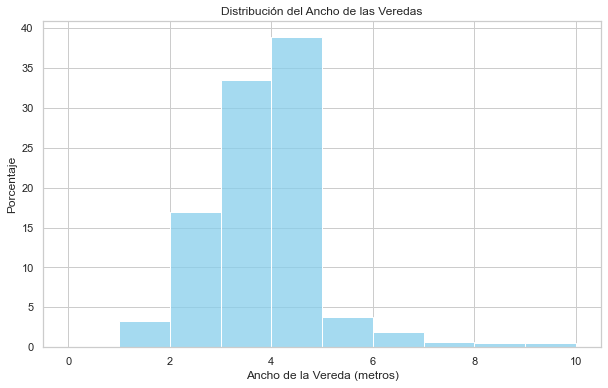

In [21]:

# Ajusta esto según el nombre real de tu columna
ancho_acera = arbolado['ancho_acera']

# Intentar convertir la columna a tipo numérico, ignorando los errores
ancho_acera_numeric = pd.to_numeric(ancho_acera, errors='coerce')

# Eliminar valores NaN
ancho_acera_numeric = ancho_acera_numeric.dropna()

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un histograma con seaborn
sns.histplot(ancho_acera_numeric, bins=range(11), color='skyblue', stat='percent')

# Configurar el título y etiquetas
plt.title('Distribución del Ancho de las Veredas')
plt.xlabel('Ancho de la Vereda (metros)')
plt.ylabel('Porcentaje')

# Mostrar el gráfico
plt.show()


**Calculo simplificado para analizar el peligro de ciertos árboles altos en veredas angostas**

Obtuvimos que 0,7% de los árboles con más de 30 metros están en veredas muy angostas (menos de 2 metros de ancho).

Parece poco el valor de 0,7% pero es muy alta analizando que estamos analizando árboles muy altos con un espacio mínimo para desarrollar sus raíces.

Habría que estar analizando constantemente la situación de estos árboles, verificando que no tengan peligro de caída. 

In [43]:
# Filtrar los árboles con más de 25 metros de altura
arboles_mayores_25m = arbolado[arbolado['altura_arbol'] > 30]

# Filtrar los árboles con aceras menores a 4 metros de ancho
arboles_aceras_menos_4m = arboles_mayores_25m[arboles_mayores_25m['ancho_acera'] < 2]

# Calcular el porcentaje
porcentaje_arboles = len(arboles_aceras_menos_4m) / len(arboles_mayores_25m) * 100

# Mostrar el resultado
print(f'Porcentaje de árboles mayores a 30 metros en aceras menores a 2 metros: {porcentaje_arboles:.2f}%')



Porcentaje de árboles mayores a 30 metros en aceras menores a 2 metros: 0.70%


**Relación entre el ancho de la vereda y la altura de los árboles**

El coeficiente de correlación entre el ancho de la acera y la altura del árbol es de aproximadamente 0.048, lo cual indica una correlación extremadamente débil entre ambas variables. En otras palabras, no hay una relación lineal significativa entre el ancho de la acera y la altura de los árboles, ya que el coeficiente de correlación está cercano a cero.







In [41]:
# Ajusta esto según el nombre real de tus columnas
altura_arbol = arbolado['altura_arbol']
ancho_acera = arbolado['ancho_acera']

# Intentar convertir las columnas a tipo numérico, ignorando los errores
altura_arbol_numeric = pd.to_numeric(altura_arbol, errors='coerce')
ancho_acera_numeric = pd.to_numeric(ancho_acera, errors='coerce')

# Eliminar valores NaN en ambas columnas
altura_arbol_numeric = altura_arbol_numeric.dropna()
ancho_acera_numeric = ancho_acera_numeric.dropna()

# Calcular el coeficiente de correlación
correlation_coefficient = altura_arbol_numeric.corr(ancho_acera_numeric)

print(f"Coeficiente de correlación: {correlation_coefficient}")


Coeficiente de correlación: 0.048165153125510146


**Gráfico de correlación**

Aquí se contempla lo explicado previamente, no hay ningun tipo de correlación entre las 2 variables.

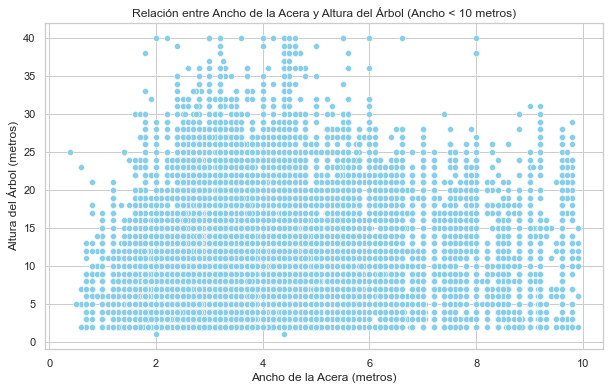

In [45]:
# Filtrar los datos donde el ancho de la acera es menor a 10 metros
arbolado_menor_10m = arbolado[arbolado['ancho_acera'] < 10]

# Ajusta esto según el nombre real de tus columnas
ancho_acera = arbolado_menor_10m['ancho_acera']
altura_arbol = arbolado_menor_10m['altura_arbol']

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un gráfico de dispersión con seaborn
sns.scatterplot(x=ancho_acera, y=altura_arbol, color='skyblue')

# Configurar el título y etiquetas
plt.title('Relación entre Ancho de la Acera y Altura del Árbol (Ancho < 10 metros)')
plt.xlabel('Ancho de la Acera (metros)')
plt.ylabel('Altura del Árbol (metros)')

# Mostrar el gráfico
plt.show()
